In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
# define some material properties
w0 = 1

# define some external wave properties
a = 1
w = .05

# Runge-Kutta 4nd order
def g(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -w0*y # - 0.1*v
    return(np.array([fy,fv],float))

def h(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -w0*y + a*np.sin(w*t) #- 0.1*v 
    return(np.array([fy,fv],float))

def crk4(f, tf, x0, y0, t0=0, dt=2**-5): 

    r = np.array([x0,y0],float) # initial condition

    tpoints = np.arange(t0, tf, dt)
    xpoints = []
    ypoints = []

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1,t+0.5*dt)
        k3 = dt*f(r+0.5*k2,t+0.5*dt)
        k4 = dt*f(r+k3, t+dt)
        r = r + (k1+2*k2+2*k3+k4)/6
        
    return(tpoints, xpoints, ypoints)

In [194]:
t0, z0, v0 = crk4(g, 100, 1, 0)
t1, z1, v1 = crk4(h, 100, 0, 0)

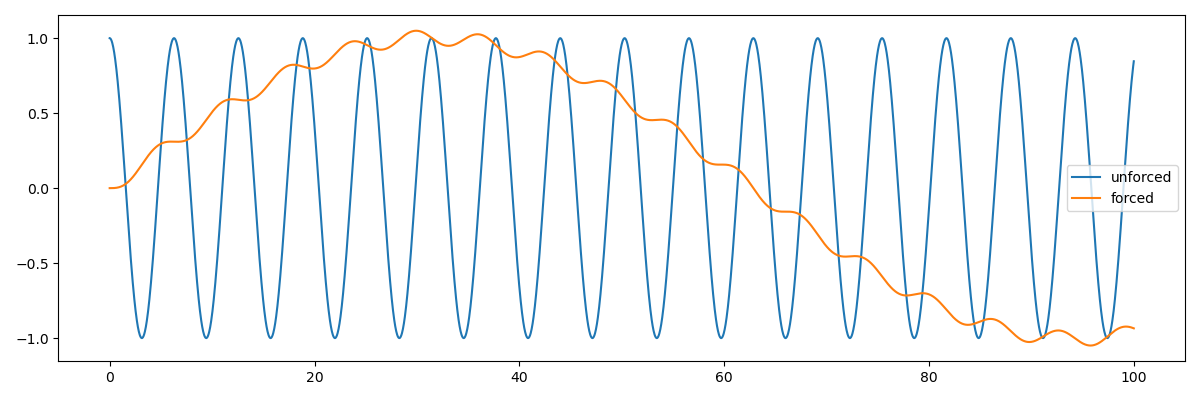

In [195]:
fig0, ax0 = plt.subplots(figsize=(12,4))
ax0.plot(t0, z0, label='unforced')
ax0.plot(t1, z1, label='forced')
ax0.legend()
fig0.tight_layout()

In [131]:
# define some material properties
w0 = 1

# define some external wave properties
a = 1
w = 1.1


# Runge-Kutta 4nd order
def f(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -w0*y + a*np.cos(w*t) #- 0.1*v 
    return(np.array([fy,fv],float))

# define boundary conditions
t0 = 0.0 # starting point
tf = 100.0 # ending point
N = 10000 # number of points between a and b
dt = (tf-t0)/N
r = np.array([0.1,0],float) # initial condition

tpoints = np.arange(t0, tf, dt)
ypoints = []
vpoints = []

for t in tpoints:
    ypoints.append(r[0])
    vpoints.append(r[1])
    k1 = dt*f(r,t)
    k2 = dt*f(r+0.5*k1,t+0.5*dt)
    k3 = dt*f(r+0.5*k2,t+0.5*dt)
    k4 = dt*f(r+k3, t+dt)
    r = r + (k1+2*k2+2*k3+k4)/6

In [132]:
ax0.plot(tpoints, ypoints, label='forced')
ax0.legend()

In [127]:
def solution(timeList, w):
    return(1/(w0**2-w**2)*a*np.cos(w*timeList))

In [128]:
ax0.plot(tpoints, solution(tpoints, w), label='steady state solution')
ax0.legend()

In [165]:
# define some material properties
w0 = 1

# define some external wave properties
a = 10
w = .1

# Runge-Kutta 4nd order
def g(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -w0*y # - 0.1*v
    return(np.array([fy,fv],float))

def h(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -w0*y + a*np.cos(w*t) #- 0.1*v 
    return(np.array([fy,fv],float))

def crk4(f, tf, x0, y0, t0=0, dt=2**-5): 

    r = np.array([x0,y0],float) # initial condition

    tpoints = np.arange(t0, tf, dt)
    xpoints = []
    ypoints = []

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1,t+0.5*dt)
        k3 = dt*f(r+0.5*k2,t+0.5*dt)
        k4 = dt*f(r+k3, t+dt)
        r = r + (k1+2*k2+2*k3+k4)/6
        
    return(tpoints, xpoints, ypoints)

In [166]:
t0, y0, v0 = crk4(g, 100, 1, 0)
t1, y1, v1 = crk4(h, 100, 0, 0)

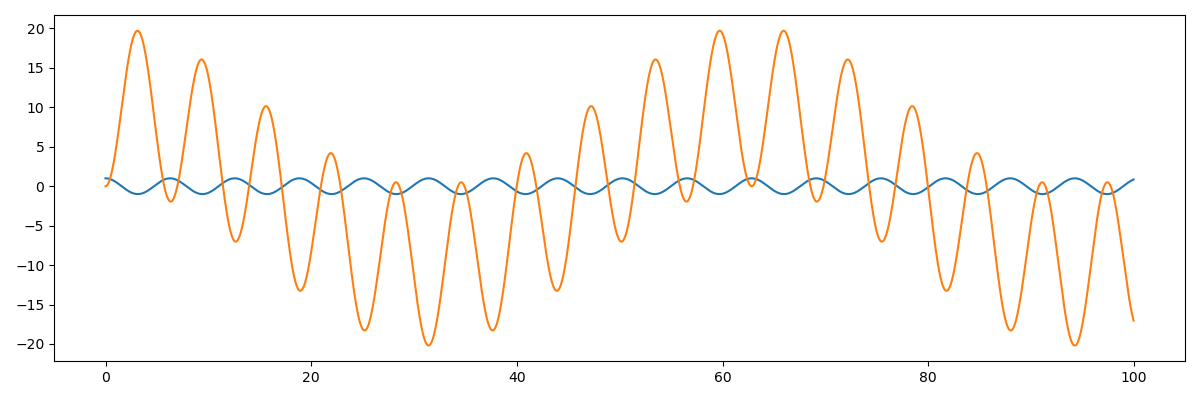

In [167]:
fig2, ax2 = plt.subplots(figsize=(12,4))
ax2.plot(t0,y0)
ax2.plot(t1,y1)
fig2.tight_layout()